In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

from utils import laplacian
from utils.rooms import setup1
from utils.plotting import plot_domain, send_zero_transparent

import matplotlib.pyplot as plt

import scipy.sparse as sps
from scipy.sparse import linalg 

dx: 0.03333333333333333 dy: 0.03333333333333333


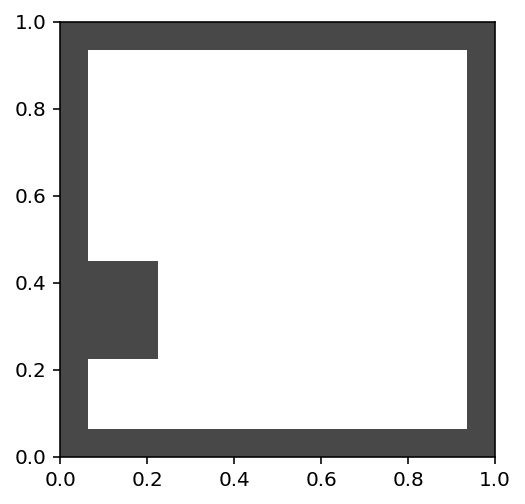

In [95]:
nx = ny = 31
xmax = 1.
ymax = 1.
dx = xmax / (nx-1)
dy = ymax / (ny-1)
print("dx:", dx, "dy:", dy)
xar = np.linspace(0, xmax, nx)
yar = np.linspace(0, ymax, ny)
xg, yg = np.meshgrid(xar, yar)

extent = [0, xar.max(), 0, yar.max()]

#rho_0, mask, exit_mask = setup1(xg, yg)

mask = np.zeros((nx, ny), dtype=bool)
b_size = 2
mask[:, :b_size] = True; mask[:b_size, :] = True
mask[-b_size:, :] = True; mask[:, -b_size:] = True
mask[7:14, :7] = True

domain_img = np.zeros((ny, nx, 4))
domain_img[mask, 3] = 1.

plot_domain(domain_img, extent=extent)

In [96]:
dt = .1 * (dx ** 2 + dy ** 2)
print("dt:", dt)
diff_coe = 1.
print("CFL:", diff_coe*dt*(1/dx**2 + 1/dy**2))
mat = diff_coe * dt * laplacian.noflux_laplacian_2d(mask, dx, dy)
mat_rshpd = mat.reshape((nx*ny, 5))

print(mat.shape)
print(mat_rshpd.shape)

dt: 0.00022222222222222223
CFL: 0.4
Neighbors of (0, 0) 	 [0 1 1 0] stencil: [-3.6  0.   1.8  1.8  0. ]
Neighbors of (0, 1) 	 [0 1 1 1] stencil: [-3.6  0.   1.8  0.9  0.9]
Neighbors of (0, 2) 	 [0 1 1 1] stencil: [-3.6  0.   1.8  0.9  0.9]
Neighbors of (0, 3) 	 [0 1 1 1] stencil: [-3.6  0.   1.8  0.9  0.9]
Neighbors of (0, 4) 	 [0 1 1 1] stencil: [-3.6  0.   1.8  0.9  0.9]
Neighbors of (0, 5) 	 [0 1 1 1] stencil: [-3.6  0.   1.8  0.9  0.9]
Neighbors of (0, 6) 	 [0 1 1 1] stencil: [-3.6  0.   1.8  0.9  0.9]
Neighbors of (0, 7) 	 [0 1 1 1] stencil: [-3.6  0.   1.8  0.9  0.9]
Neighbors of (0, 8) 	 [0 1 1 1] stencil: [-3.6  0.   1.8  0.9  0.9]
Neighbors of (0, 9) 	 [0 1 1 1] stencil: [-3.6  0.   1.8  0.9  0.9]
Neighbors of (0, 10) 	 [0 1 1 1] stencil: [-3.6  0.   1.8  0.9  0.9]
Neighbors of (0, 11) 	 [0 1 1 1] stencil: [-3.6  0.   1.8  0.9  0.9]
Neighbors of (0, 12) 	 [0 1 1 1] stencil: [-3.6  0.   1.8  0.9  0.9]
Neighbors of (0, 13) 	 [0 1 1 1] stencil: [-3.6  0.   1.8  0.9  0.9]
Neighbor

In [97]:
# layout is center, left, right, up, down
# left and down dead
print(mask[0,0])
print(mat[0,0])

# 
print(mask[3,0])
print(mat[3,0])

# up-node dead
print(mask[0, 2])
print(mat[0, 2])
# down edge dead

# down is dead
print(mask[2,0])
print(mat[2,0])

True
[-0.8  0.   0.4  0.4  0. ]
True
[-0.8  0.2  0.2  0.4  0. ]
True
[-0.8  0.   0.4  0.2  0.2]
True
[-0.8  0.2  0.2  0.4  0. ]


In [108]:
from utils.laplacian import assemble_matrix

mat_sparse = assemble_matrix(mat_rshpd, nx, ny)
mat_sparse.toarray()

array([[-0.8,  0.2,  0. , ...,  0. ,  0. ,  0. ],
       [ 0.4, -0.8,  0.2, ...,  0. ,  0. ,  0. ],
       [ 0. ,  0.2, -0.8, ...,  0. ,  0. ,  0. ],
       ...,
       [ 0. ,  0. ,  0. , ..., -0.8,  0.2,  0. ],
       [ 0. ,  0. ,  0. , ...,  0.2, -0.8,  0.4],
       [ 0. ,  0. ,  0. , ...,  0. ,  0.2, -0.8]])

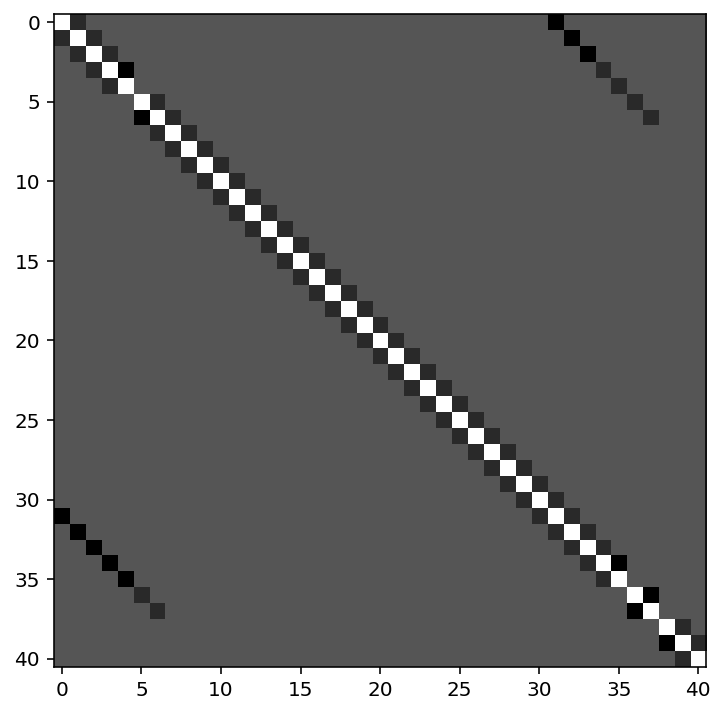

In [109]:
plt.figure(figsize=(6,6))
plt.imshow(mat_sparse.toarray()[nx-5:2*nx+5, nx-5:2*nx+5], cmap=plt.cm.binary)

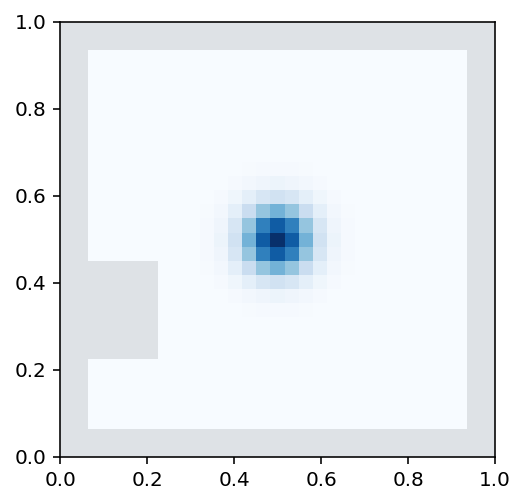

In [110]:
initial_distrib = np.exp(-((xg-.5)**2 + (yg-.5)**2)/.006)
initial_distrib[mask] = 0.
#initial_distrib = np.zeros_like(xg)
#initial_distrib[:2, 10:12] = .5
#initial_distrib[10:12, :2] = 1.
initial_distrib /= initial_distrib.sum()
initial_distrib_flat = initial_distrib.ravel()

plt.imshow(initial_distrib, cmap=plt.cm.Blues, extent=extent, origin='lower')
plot_domain(domain_img, alpha=.1, extent=extent)

In [111]:
print(mat[10, 0])
laplacian._get_neighbors(mask, 10, 0)

[-0.8  0.2  0.2  0.4  0. ]


array([1, 1, 1, 0])

In [112]:
print(mat[0, 10])
laplacian._get_neighbors(mask, 0, 10)

[-0.8  0.   0.4  0.2  0.2]


array([0, 1, 1, 1])

In [113]:
print(mat_sparse.toarray()[nx-3:nx+3,nx-3:nx+3])

[[-0.8  0.2  0.   0.   0.   0. ]
 [ 0.2 -0.8  0.4  0.   0.   0. ]
 [ 0.   0.2 -0.8  0.   0.   0. ]
 [ 0.   0.   0.  -0.8  0.2  0. ]
 [ 0.   0.   0.   0.4 -0.8  0.2]
 [ 0.   0.   0.   0.   0.2 -0.8]]


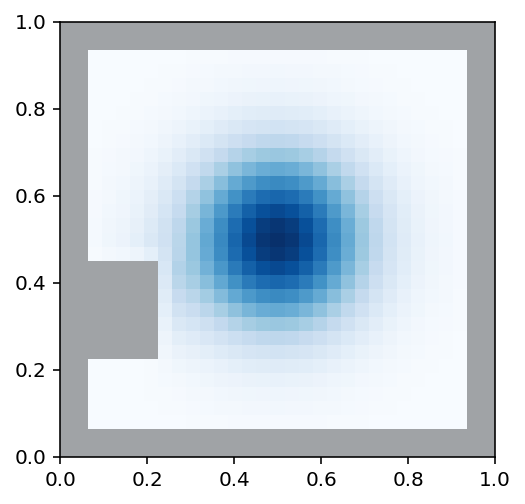

In [114]:
res_ = [initial_distrib_flat]

for _ in range(40):
    next_iter = res_[-1] + mat_sparse @ res_[-1]
    res_.append(next_iter)


state_final = res_[-1].reshape(nx, ny)

plt.imshow(state_final, cmap=plt.cm.Blues,
           extent=extent, origin='lower')
plot_domain(domain_img, alpha=.35, extent=extent)

In [115]:
print("Total mass:", state_final.sum())
print("Mass outside:", state_final[~mask].sum())

Total mass: 1.0000000000000002
Mass outside: 1.0000000000000002


### Implicit stepping

In [116]:
A_ = sps.identity(nx*nx) - mat_sparse
A_.toarray()[nx-4:nx+4, nx-4:nx+4]

array([[ 1.8, -0.2,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [-0.2,  1.8, -0.2,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. , -0.2,  1.8, -0.4,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. , -0.2,  1.8,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  1.8, -0.2,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. , -0.4,  1.8, -0.2,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. , -0.2,  1.8, -0.2],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. , -0.2,  1.8]])

Total mass: 0.9999999999999987
Mass outside: 0.0


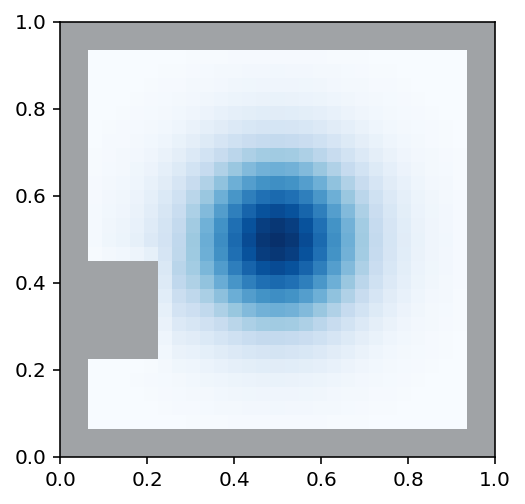

In [117]:
res_ = [initial_distrib_flat]

for _ in range(40):
    next_iter = linalg.spsolve(A_, res_[-1])
    res_.append(next_iter)

state_final = res_[-1].reshape(nx, ny)

plt.imshow(state_final, cmap=plt.cm.Blues,
           extent=extent, origin='lower')
plot_domain(domain_img, alpha=.35)

print("Total mass:", state_final.sum())
print("Mass outside:", state_final[mask].sum())